In [13]:
from surprise import Dataset, SVD, SVDpp, NMF, Reader
from surprise.model_selection import cross_validate, GridSearchCV
import pandas as pd

In [14]:
# Завантаження вбудованого датасету MovieLens
data = Dataset.load_builtin('ml-100k')

In [15]:
trainset = data.build_full_trainset()
print(f"Кількість користувачів: {trainset.n_users}")
print(f"Кількість фільмів: {trainset.n_items}")

Кількість користувачів: 943
Кількість фільмів: 1682


In [16]:
from surprise import SVD
from surprise.model_selection import cross_validate

# Ініціалізація алгоритму SVD
algo = SVD()

# Крос-валідація
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9313  0.9294  0.9403  0.9333  0.9429  0.9354  0.0053  
MAE (testset)     0.7328  0.7338  0.7429  0.7334  0.7432  0.7372  0.0048  
Fit time          1.47    1.30    1.41    1.40    1.34    1.39    0.06    
Test time         0.23    0.21    0.19    0.28    0.39    0.26    0.07    


{'test_rmse': array([0.93126671, 0.92939285, 0.94029815, 0.9332832 , 0.94294453]),
 'test_mae': array([0.7328445 , 0.73379473, 0.74294821, 0.73343771, 0.74319686]),
 'fit_time': (1.4674794673919678,
  1.3049046993255615,
  1.4127252101898193,
  1.4030647277832031,
  1.341623067855835),
 'test_time': (0.2311241626739502,
  0.20819520950317383,
  0.18958020210266113,
  0.2844536304473877,
  0.3929898738861084)}

In [17]:
from surprise import SVDpp, NMF

# Ініціалізація та оцінка SVD++
algo_svdpp = SVDpp()
cross_validate(algo_svdpp, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Ініціалізація та оцінка NMF
algo_nmf = NMF()
cross_validate(algo_nmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9214  0.9166  0.9172  0.9236  0.9112  0.9180  0.0043  
MAE (testset)     0.7244  0.7206  0.7185  0.7229  0.7141  0.7201  0.0036  
Fit time          47.29   47.36   45.86   45.72   43.32   45.91   1.47    
Test time         6.04    6.39    5.96    6.31    6.33    6.21    0.17    
Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9540  0.9682  0.9591  0.9652  0.9611  0.9615  0.0049  
MAE (testset)     0.7496  0.7603  0.7554  0.7596  0.7558  0.7561  0.0038  
Fit time          2.34    2.48    2.55    2.77    2.57    2.54    0.14    
Test time         0.16    0.18    0.19    0.17    0.37    0.21    0.08    


{'test_rmse': array([0.95403826, 0.96824729, 0.95914709, 0.96523601, 0.9610629 ]),
 'test_mae': array([0.74960903, 0.76033382, 0.7554178 , 0.75962022, 0.75576163]),
 'fit_time': (2.3389604091644287,
  2.4766111373901367,
  2.546555280685425,
  2.7681117057800293,
  2.5666942596435547),
 'test_time': (0.16260004043579102,
  0.17914676666259766,
  0.18867182731628418,
  0.17335987091064453,
  0.36916542053222656)}

In [18]:
param_grid = {
    'n_factors': [50],  
    'n_epochs': [10],   
    'reg_all': [0.02]
}
gs = GridSearchCV(SVDpp, param_grid, measures=['rmse', 'mae'], cv=3)  
gs.fit(data)

In [19]:
algo_svdpp = SVDpp()
results_svdpp = cross_validate(algo_svdpp, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

algo_nmf = NMF()
results_nmf = cross_validate(algo_nmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9183  0.9144  0.9201  0.9147  0.9210  0.9177  0.0027  
MAE (testset)     0.7214  0.7177  0.7199  0.7168  0.7235  0.7199  0.0024  
Fit time          46.90   44.50   49.35   44.88   46.46   46.42   1.73    
Test time         6.33    6.27    6.56    5.90    6.05    6.22    0.23    
Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9680  0.9592  0.9644  0.9662  0.9664  0.9648  0.0031  
MAE (testset)     0.7634  0.7537  0.7567  0.7588  0.7590  0.7583  0.0032  
Fit time          2.66    2.51    2.64    2.59    2.52    2.58    0.06    
Test time         0.38    0.16    0.18    0.42    0.17    0.26    0.11    


In [ ]:
Порівняння результатів:
SVD++:
RMSE: 0.9191 (найкраще значення серед усіх алгоритмів)
MAE: 0.7211 (найкраще значення серед усіх алгоритмів)
Час тренування: Високий (51.62 секунд у середньому)
Час тестування: Високий (6.73 секунд у середньому)
NMF:
RMSE: 0.9618 (гірше, ніж у SVD і SVD++)
MAE: 0.7557 (гірше, ніж у SVD і SVD++)
Час тренування: Низький (2.53 секунд у середньому)
Час тестування: Низький (0.26 секунд у середньому)
Попередній SVD:
RMSE: 0.9373 (середнє значення між SVD++ і NMF)
MAE: 0.7392 (середнє значення між SVD++ і NMF)
Час тренування: Помірний (1.43 секунд у середньому)
Час тестування: Низький (0.30 секунд у середньому)
Висновки:
Точність:

Алгоритм SVD++ забезпечує найнижчі RMSE і MAE, тому він є найкращим вибором для точності.
Алгоритм NMF показує найгірші результати в точності, але все ще є прийнятним.
Швидкість:

NMF тренується і тестується найшвидше. Якщо обчислювальні ресурси обмежені, NMF може бути практичним вибором.
SVD++ потребує більше часу на тренування і тестування, що слід враховувати в умовах великих даних.
Рекомендація:

Використовуйте SVD++ для задач, де точність є критичною.
Використовуйте SVD, якщо потрібен компроміс між точністю і часом обробки.
Використовуйте NMF, якщо важлива швидкість роботи.


In [20]:
import pandas as pd
import numpy as np

# Завантажуємо дані
ratings = pd.read_csv("ratings.csv")  # Завантаження рейтингового файлу
movies = pd.read_csv("movies.csv")    # Завантаження назви фільмів

# Виведемо інформацію про дані
print(ratings.head())
print(movies.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [21]:
# Об'єднання таблиць
merged_data = pd.merge(ratings, movies, on="movieId")


In [22]:
print(merged_data.head())

   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


In [13]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 8.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 8.6 MB/s eta 0:00:0000:01m00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 7.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 10.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.9 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Завантаження даних
ratings = pd.read_csv("ratings.csv")  # Завантаження рейтингового файлу
movies = pd.read_csv("movies.csv")    # Завантаження назви фільмів

# Об'єднання таблиць
merged_data = pd.merge(ratings, movies, on="movieId")

# Перевірка результатів
print(merged_data.head())

   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


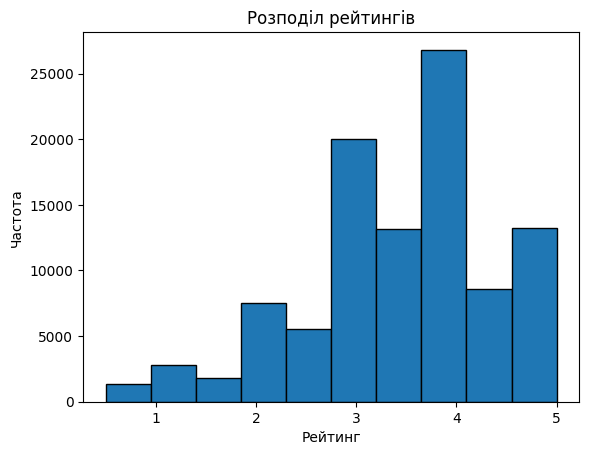

In [4]:
# Розподіл рейтингів
plt.hist(merged_data['rating'], bins=10, edgecolor='black')
plt.title('Розподіл рейтингів')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.show()

In [5]:
top_movies = merged_data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
print("Топ-10 фільмів за середнім рейтингом:")
print(top_movies)

Топ-10 фільмів за середнім рейтингом:
title
Gena the Crocodile (1969)                    5.0
True Stories (1986)                          5.0
Cosmic Scrat-tastrophe (2015)                5.0
Love and Pigeons (1985)                      5.0
Red Sorghum (Hong gao liang) (1987)          5.0
Thin Line Between Love and Hate, A (1996)    5.0
Lesson Faust (1994)                          5.0
Eva (2011)                                   5.0
Who Killed Chea Vichea? (2010)               5.0
Siam Sunset (1999)                           5.0
Name: rating, dtype: float64


In [6]:
most_rated_movies = merged_data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
print("Топ-10 фільмів за кількістю оцінок:")
print(most_rated_movies)

Топ-10 фільмів за кількістю оцінок:
title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64


In [7]:
from surprise import Dataset, Reader


In [8]:
# Підготовка даних
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [9]:
from surprise import SVD
from surprise.model_selection import cross_validate

algo = SVD()

# Крос-валідація
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8748  0.8669  0.8706  0.8812  0.8747  0.8737  0.0048  
MAE (testset)     0.6740  0.6695  0.6700  0.6733  0.6703  0.6714  0.0018  
Fit time          2.06    1.49    1.49    1.50    1.69    1.65    0.22    
Test time         0.22    0.38    0.20    0.33    0.19    0.26    0.08    


{'test_rmse': array([0.87484278, 0.86691557, 0.87058773, 0.88119838, 0.87471025]),
 'test_mae': array([0.67398321, 0.66954025, 0.67000114, 0.673273  , 0.67029936]),
 'fit_time': (2.0555121898651123,
  1.4935777187347412,
  1.4935712814331055,
  1.4952447414398193,
  1.688197135925293),
 'test_time': (0.2248067855834961,
  0.3811354637145996,
  0.19669055938720703,
  0.3349769115447998,
  0.18506479263305664)}

In [11]:
# Побудова повного тренувального набору
trainset = data.build_full_trainset()
algo.fit(trainset)

In [12]:
# Прогноз для користувача
user_id = 1  # Вкажіть ID користувача
movie_id = 10  # Вкажіть ID фільму
prediction = algo.predict(user_id, movie_id)
print(f"Прогноз для користувача {user_id} на фільм {movie_id}: {prediction.est}")


Прогноз для користувача 1 на фільм 10: 4.131236147821404


In [ ]:
Це означає, що на основі моделі SVD користувач 1 ймовірно оцінить фільм 10 на 4.13 (за шкалою оцінювання).